<a href="https://colab.research.google.com/github/Pallerlasiddi2004/assignment2/blob/main/minorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [1]:
from google.colab import drive 
drive.mount('/content/drive')
     

Mounted at /content/drive


Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()
     

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape
     

(2290, 6)

Missing Values Treatment

In [6]:
# checking the number of missing values
gold_data.isnull().sum()
     

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Statistical Information of Data

In [7]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Splitting the Features and Target

In [8]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

In [9]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers_SPX = detect_outliers_zscore(gold_data['SPX'])
sample_outliers_USO = detect_outliers_zscore(gold_data['USO'])
sample_outliers_SLV = detect_outliers_zscore(gold_data['SLV'])
sample_outliers_EURUSD = detect_outliers_zscore(gold_data['EUR/USD'])
print("Outliers in SPX column from Z-scores method: ", sample_outliers_SPX)
print("Outliers in USO column from Z-scores method: ", sample_outliers_USO)
print("Outliers in SLV column from Z-scores method: ", sample_outliers_SLV)
print("Outliers in EUR/USD column from Z-scores method: ", sample_outliers_EURUSD)


Outliers in SPX column from Z-scores method:  []
Outliers in USO column from Z-scores method:  [91.440002, 92.150002, 92.370003, 94.379997, 95.080002, 95.18, 93.199997, 95.690002, 92.989998, 96.739998, 98.379997, 99.800003, 100.660004, 100.110001, 101.709999, 100.220001, 100.209999, 102.800003, 104.300003, 108.309998, 105.629997, 104.260002, 105.919998, 102.260002, 103.050003, 100.650002, 98.980003, 103.949997, 109.050003, 107.019997, 110.989998, 111.269997, 108.989998, 108.68, 110.889999, 106.910004, 110.919998, 110.949997, 108.5, 113.120003, 114.589996, 116.839996, 116.82, 114.949997, 109.919998, 109.650002, 114.339996, 117.480003, 112.389999, 109.25, 105.529999, 106.669998, 103.32, 100.019997, 101.459999, 100.540001, 98.040001, 102.129997, 96.440002, 93.099998, 93.900002, 95.660004, 93.389999]
Outliers in SLV column from Z-scores method:  [42.419998, 43.0, 44.119999, 45.540001, 45.830002, 44.029999, 47.0, 47.259998, 42.830002, 42.630001]
Outliers in EUR/USD column from Z-scores meth

In [10]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers_SPX = detect_outliers_zscore(gold_data['SPX'])
sample_outliers_USO = detect_outliers_zscore(gold_data['USO'])
sample_outliers_SLV = detect_outliers_zscore(gold_data['SLV'])
sample_outliers_EURUSD = detect_outliers_zscore(gold_data['EUR/USD'])
print("Outliers in SPX column from Z-scores method: ", sample_outliers_SPX)
print("Outliers in USO column from Z-scores method: ", sample_outliers_USO)
print("Outliers in SLV column from Z-scores method: ", sample_outliers_SLV)
print("Outliers in EUR/USD column from Z-scores method: ", sample_outliers_EURUSD)


Outliers in SPX column from Z-scores method:  []
Outliers in USO column from Z-scores method:  [91.440002, 92.150002, 92.370003, 94.379997, 95.080002, 95.18, 93.199997, 95.690002, 92.989998, 96.739998, 98.379997, 99.800003, 100.660004, 100.110001, 101.709999, 100.220001, 100.209999, 102.800003, 104.300003, 108.309998, 105.629997, 104.260002, 105.919998, 102.260002, 103.050003, 100.650002, 98.980003, 103.949997, 109.050003, 107.019997, 110.989998, 111.269997, 108.989998, 108.68, 110.889999, 106.910004, 110.919998, 110.949997, 108.5, 113.120003, 114.589996, 116.839996, 116.82, 114.949997, 109.919998, 109.650002, 114.339996, 117.480003, 112.389999, 109.25, 105.529999, 106.669998, 103.32, 100.019997, 101.459999, 100.540001, 98.040001, 102.129997, 96.440002, 93.099998, 93.900002, 95.660004, 93.389999]
Outliers in SLV column from Z-scores method:  [42.419998, 43.0, 44.119999, 45.540001, 45.830002, 44.029999, 47.0, 47.259998, 42.830002, 42.630001]
Outliers in EUR/USD column from Z-scores meth

In [11]:

from scipy.stats import zscore

z3 = np.abs(zscore(gold_data['SLV']))

gold_data['Zscore_SLV'] = z3



outliers_SLV=len(gold_data[gold_data['Zscore_SLV']>3])


print(outliers_SLV)


data_z = gold_data[gold_data['Zscore_SLV']<3]

gold_data=data_z.drop(['Zscore_SLV' ], axis=1)
gold_data

10


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


Splitting into Training data and Test Data



In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
     

Model Training: Random Forest Regressor

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
# training the model
regressor.fit(X_train,Y_train)
     

RandomForestRegressor()

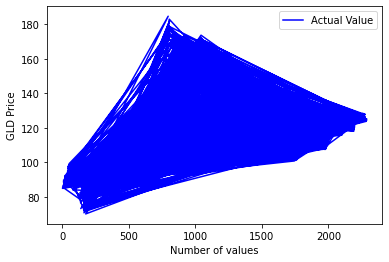

In [17]:
plt.plot(Y_train, color='blue', label = 'Actual Value')

plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Model Evaluation

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
     

print(test_data_prediction)
     

[168.60309967  82.21669983 115.84679986 127.73350065 120.76440109
 154.76389782 150.45329813 126.02190033 117.49569883 126.08950045
 116.89150062 171.90710069 141.7862981  167.74939789 115.20459998
 117.97730035 137.94090271 169.87170054 159.14440285 159.64499977
 155.04520038 125.30520022 176.45309975 157.37960375 125.1883006
  93.83569983  76.83330024 120.42690011 119.11349909 167.33849962
  88.1280008  125.33390029  91.03080073 117.64650022 121.07769963
 136.28700011 115.50630124 115.52410045 147.91780016 107.18470101
 104.28010224  87.13829789 126.43800071 117.89950012 153.02539887
 119.6974003  108.27899999 108.19109825  93.22020066 127.10509776
  75.1521006  113.52499914 121.25749994 111.03409933 118.97009895
 120.32699937 159.0794993  168.04690106 146.98529706  85.83939845
  94.23630034  86.91809876  90.62829978 118.96700073 126.37170084
 127.72220004 170.01310036 122.25049966 117.38339874  98.13390051
 168.46900075 143.07919825 131.52900265 121.27170242 120.99739974
 119.757500

In [23]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)
     
     

R squared error :  0.9894663779735812


In [20]:
Y_test = list(Y_test)

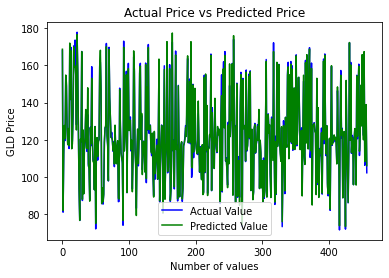

In [21]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [24]:
y_pred_test =  regressor.predict(X_test)
y_pred_train =  regressor.predict(X_train)

Error Metrics Computation

In [25]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(Y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(Y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(Y_train, y_pred_train)
print('Mean absolute error', mae)
     
     

Root mean square error 0.9276486846126282
Mean square error 0.8605320820635393
Mean absolute error 0.4936912503657193


In [26]:
#Training Accuracies
rmse = math.sqrt(mean_squared_error(Y_test, y_pred_test)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(Y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(Y_test, y_pred_test)
print('Mean absolute error', mae)
     

Root mean square error 2.3570936502770103
Mean square error 5.5558904761762005
Mean absolute error 1.3201494891484684


Save Model

In [27]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

Deployment

In [28]:
4list_of_columns = gold_data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['GLD'], axis='columns', inplace=True)
input_data.drop(['Date'], axis='columns', inplace=True)

input_data.at[0, 'SPX'] = float(input('enter SPX'))
input_data.at[0, 'USO'] = float(input('enter USO'))
input_data.at[0, 'SLV'] = float(input('enter SLV'))
input_data.at[0, 'EUR/USD'] = float(input('enter EUR/USD'))
gold_price = regressor.predict(input_data[:1])
print('gold_price',gold_price)

enter SPX54
enter USO45
enter SLV55
enter EUR/USD65
gold_price [152.44309913]


In [29]:
import pickle

list_of_columns = gold_data.columns
input_data=pd.DataFrame(columns=list_of_columns)
print(gold_data.columns)
column_name='list_of_columns.pkl'
pickle.dump(gold_data,open(column_name,'wb'))
     

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')
